# Automated Metaheuristic Design with CustomHyS
> CUSTOMHyS: Customising Optimisation Metaheuristics via
Hyper-heuristic Search
Por: Jorge Mario Cruz Duarte [(jorge.cruz@tec.mx)](mailto:jorge.cruz@tec.mx)

This tutorial is based on the manuscript at [SoftwareX](https://www.sciencedirect.com/science/article/pii/S2352711020303411)

## 0. Installing the package or downloading it from GitHub
This only applies if you don't have the package installed, for example, when using Google Colab.

In [73]:
# !pip install customhys==1.1.6.
# !pip install latex
# !pip install optproblems

In [74]:
# !git clone https://github.com/jcrvz/customhys.git .

## 1. Module of Benchmark Functions (customhys.benchmark_func)
In this section, we will see how to use the test functions that come with the framework.

First, we will load the corresponding module and other utilities for plotting.

In [75]:
from cProfile import label

from customhys import benchmark_func as bf

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import numpy as np
import pandas as pd

Let us see the list of benchmark functions:

In [76]:
functions =bf.__all__
functions

['Ackley1',
 'Ackley4',
 'Alpine1',
 'Alpine2',
 'Bohachevsky',
 'Brent',
 'Brown',
 'CarromTable',
 'ChungReynolds',
 'Cigar',
 'CosineMixture',
 'CrossInTray',
 'CrossLegTable',
 'CrownedCross',
 'Csendes',
 'Deb1',
 'Deb2',
 'DeflectedCorrugatedSpring',
 'DixonPrice',
 'DropWave',
 'EggHolder',
 'Ellipsoid',
 'ExpandedDecreasingMinima',
 'ExpandedEqualMinima',
 'ExpandedFiveUnevenPeakTrap',
 'ExpandedTwoPeakTrap',
 'ExpandedUnevenMinima',
 'Exponential',
 'F2',
 'Giunta',
 'Griewank',
 'HappyCat',
 'HyperEllipsoid',
 'InvertedCosineWave',
 'JennrichSampson',
 'KTablet',
 'Katsuura',
 'Levy',
 'LunacekN01',
 'LunacekN02',
 'Michalewicz',
 'Mishra1',
 'Mishra2',
 'Mishra7',
 'Mishra11',
 'ModifiedVincent',
 'NeedleEye',
 'Pathological',
 'Periodic',
 'Perm01',
 'Perm02',
 'Pinter',
 'PowellSum',
 'Price01',
 'Qing',
 'Quartic',
 'Quintic',
 'Rana',
 'Rastrigin',
 'Ridge',
 'Rosenbrock',
 'RotatedHyperEllipsoid',
 'Salomon',
 'Sargan',
 'SchafferN1',
 'SchafferN2',
 'SchafferN3',
 'Sch

In [77]:
print("Total of functions: ", len(functions))

Total of functions:  108


Let us try the Rastrigin function and plot it

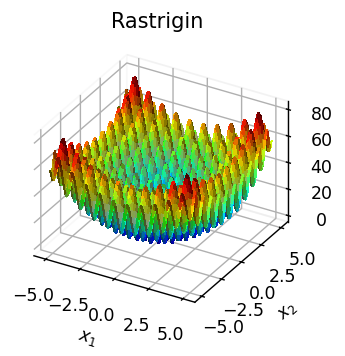

In [78]:
fun = bf.Rastrigin(2)
fun.plot(samples=100, resolution=125)
plt.show()

Now, let us plot it in another way, through evaluations.

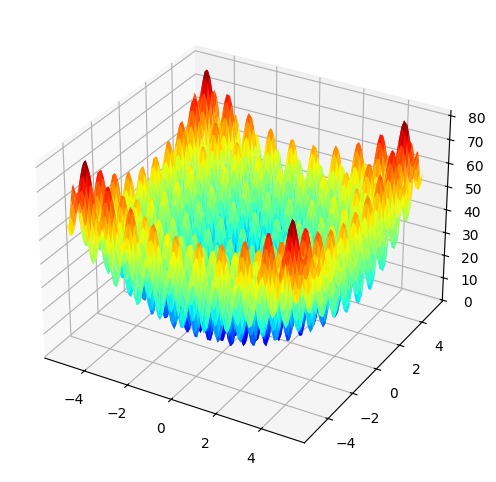

In [79]:
samples = 100

space_constraints = np.array(fun.get_search_range()).T

X, Y = np.meshgrid(np.linspace(*space_constraints[0], samples),
                   np.linspace(*space_constraints[1], samples))
Z = np.array([fun.get_function_value([x, y])
          for x, y in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.5,
                antialiased=True, cmap=plt.cm.jet)
plt.show()

Plot another function and modify its behaviour a little

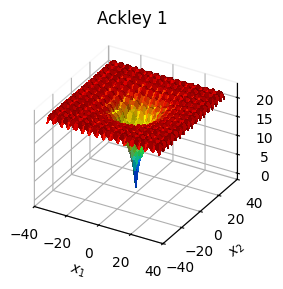

In [80]:
fun = bf.Ackley1(2)
fun.plot()
plt.show()

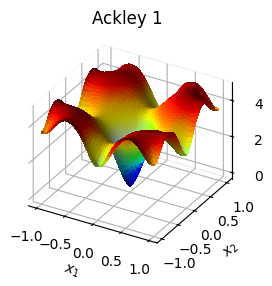

In [81]:
fun.set_search_range([-1.0, -1.0], [1.0, 1.0])
fun.plot()
plt.show()

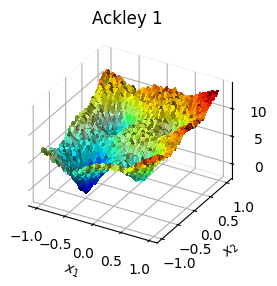

In [82]:
fun.set_offset_function(-2)
fun.set_scale_function(2)
fun.set_noise_level(1.0)
fun.set_offset_domain([0.5, 0.5])
fun.plot()
plt.show()

## 2. Module of Population (customhys.population)
In this section, we will review the use of the population module, which is the base of the algorithms we are going to design.

Let us begin by importing the module and other utilities for plotting.

In [83]:
from customhys import  population as pp
fun = bf.Rastrigin(2)

Now, we will generate a population in the search space of the previous problem. This generation can be random or following a vertex pattern:

In [84]:
pop = pp.Population(fun.get_search_range(), num_agents=50)
pop.initialise_positions('vertex')
# pop.initialise_positions('random')

Notice the difference between the internal positions of the population and the external positions to the population:


In [85]:
print("Internal Positions: ", pop.positions)
print("External Positions: ", pop.get_positions())


Internal Positions:  [[-1.         -1.        ]
 [-1.          1.        ]
 [ 1.         -1.        ]
 [ 1.          1.        ]
 [-0.92307692 -0.92307692]
 [-0.92307692  0.92307692]
 [ 0.92307692 -0.92307692]
 [ 0.92307692  0.92307692]
 [-0.84615385 -0.84615385]
 [-0.84615385  0.84615385]
 [ 0.84615385 -0.84615385]
 [ 0.84615385  0.84615385]
 [-0.76923077 -0.76923077]
 [-0.76923077  0.76923077]
 [ 0.76923077 -0.76923077]
 [ 0.76923077  0.76923077]
 [-0.69230769 -0.69230769]
 [-0.69230769  0.69230769]
 [ 0.69230769 -0.69230769]
 [ 0.69230769  0.69230769]
 [-0.61538462 -0.61538462]
 [-0.61538462  0.61538462]
 [ 0.61538462 -0.61538462]
 [ 0.61538462  0.61538462]
 [-0.53846154 -0.53846154]
 [-0.53846154  0.53846154]
 [ 0.53846154 -0.53846154]
 [ 0.53846154  0.53846154]
 [-0.46153846 -0.46153846]
 [-0.46153846  0.46153846]
 [ 0.46153846 -0.46153846]
 [ 0.46153846  0.46153846]
 [-0.38461538 -0.38461538]
 [-0.38461538  0.38461538]
 [ 0.38461538 -0.38461538]
 [ 0.38461538  0.38461538]
 [-0.30

Due to the fact that we need to evaluate the quality of each position for a given problem, we must have the function to evaluate.

In [86]:
pop.evaluate_fitness(lambda x: fun.get_function_value(x))
print(pop.fitness)

[57.84942745 57.84942745 57.84942745 57.84942745 67.65845725 67.65845725
 67.65845725 67.65845725 67.42595459 67.42595459 67.42595459 67.42595459
 32.4994656  32.4994656  32.4994656  32.4994656  64.34789832 64.34789832
 64.34789832 64.34789832 28.17732858 28.17732858 28.17732858 28.17732858
 34.33154453 34.33154453 34.33154453 34.33154453 44.21226873 44.21226873
 44.21226873 44.21226873  8.12833712  8.12833712  8.12833712  8.12833712
 42.76180949 42.76180949 42.76180949 42.76180949 14.45180467 14.45180467
 14.45180467 14.45180467 16.54851609 16.54851609 16.54851609 16.54851609
 36.02404588 36.02404588]


Let us see these initial positions in the search space

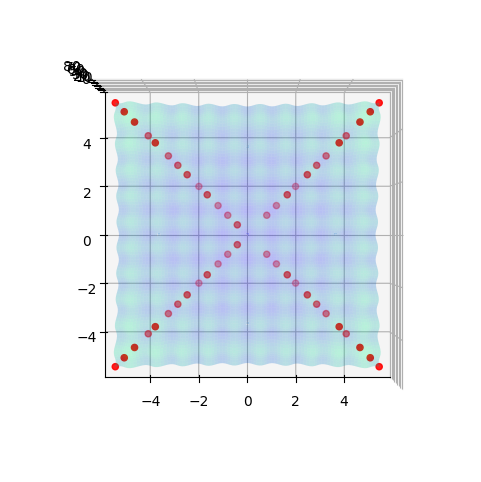

In [87]:
def show_positions(azim=-90, elev=90):
    positions = np.array(pop.get_positions())
    fitness = pop.fitness

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(projection='3d', )
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.5,
                    antialiased=True, cmap=plt.cm.winter, alpha=0.25)
    ax.scatter(positions[:,0], positions[:,1], pop.fitness,
               marker='o', color='r')
    ax.view_init(elev, azim)
    plt.show()

show_positions()

An important part of the population is the update of the particular positions, which are used by some operators.

In [88]:
pop.update_positions(level='population', selector='all')
pop.update_positions(level='particular', selector='all')
pop.update_positions(level='global', selector='greedy')

Now, let us see which is the best position among all.

In [89]:
print(pop.get_state())

x_best = [-1.96923077 -1.96923077], f_best = 8.128337122182147


## 3. Module of Operators (customhys.operators)
In this section we will see one of the most important modules, this is the one of the operators that will help us to build the desired algorithm.

In [90]:
from customhys import operators as op

Let us see the available operators:

In [91]:
print('Perturbadores: ', op.__all__)

Perturbadores:  ['local_random_walk', 'random_search', 'random_sample', 'random_flight', 'differential_mutation', 'firefly_dynamic', 'swarm_dynamic', 'gravitational_search', 'central_force_dynamic', 'spiral_dynamic', 'genetic_mutation', 'genetic_crossover']


In [92]:
print('Selectores: ', op.__selectors__)

Selectores:  ['all', 'greedy', 'metropolis', 'probabilistic']


Now, let us check the default collection of operators.

In [21]:
import pkgutil
data = pkgutil.get_data("customhys", "collections/default.txt")

for i, x in enumerate(data.decode().split("\n")[:-1]):
    print(i, x, sep=" :: ")

0 :: ('random_search', {'scale': 1.0, 'distribution': 'uniform'}, 'greedy')
1 :: ('central_force_dynamic', {'gravity': 0.001, 'alpha': 0.01, 'beta': 1.5, 'dt': 1.0}, 'all')
2 :: ('central_force_dynamic', {'gravity': 0.001, 'alpha': 0.01, 'beta': 1.5, 'dt': 1.0}, 'greedy')
3 :: ('central_force_dynamic', {'gravity': 0.001, 'alpha': 0.01, 'beta': 1.5, 'dt': 1.0}, 'metropolis')
4 :: ('central_force_dynamic', {'gravity': 0.001, 'alpha': 0.01, 'beta': 1.5, 'dt': 1.0}, 'probabilistic')
5 :: ('differential_mutation', {'expression': 'rand', 'num_rands': 1, 'factor': 1.0}, 'all')
6 :: ('differential_mutation', {'expression': 'rand', 'num_rands': 1, 'factor': 1.0}, 'greedy')
7 :: ('differential_mutation', {'expression': 'rand', 'num_rands': 1, 'factor': 1.0}, 'metropolis')
8 :: ('differential_mutation', {'expression': 'rand', 'num_rands': 1, 'factor': 1.0}, 'probabilistic')
9 :: ('differential_mutation', {'expression': 'best', 'num_rands': 1, 'factor': 1.0}, 'all')
10 :: ('differential_mutation',

In [93]:
dop = [eval(x) for x in data.decode().split("\n")[:-1]]
pd.DataFrame(dop, columns=['Perturbator', 'Parameters', 'Selector'])

,Perturbator,Parameters,Selector
0,random_search,"{'scale': 1.0, 'distribution': 'uniform'}",greedy
1,central_force_dynamic,"{'gravity': 0.001, 'alpha': 0.01, 'beta': 1.5,...",all
2,central_force_dynamic,"{'gravity': 0.001, 'alpha': 0.01, 'beta': 1.5,...",greedy
3,central_force_dynamic,"{'gravity': 0.001, 'alpha': 0.01, 'beta': 1.5,...",metropolis
4,central_force_dynamic,"{'gravity': 0.001, 'alpha': 0.01, 'beta': 1.5,...",probabilistic
...,...,...,...
200,swarm_dynamic,"{'factor': 1.0, 'self_conf': 2.54, 'swarm_conf...",probabilistic
201,swarm_dynamic,"{'factor': 1.0, 'self_conf': 2.54, 'swarm_conf...",all
202,swarm_dynamic,"{'factor': 1.0, 'self_conf': 2.54, 'swarm_conf...",greedy
203,swarm_dynamic,"{'factor': 1.0, 'self_conf': 2.54, 'swarm_conf...",metropolis


You can also generate a collection automatically and then distil it in your favourite text editor.

In [94]:
op_task = op.obtain_operators(num_vals=5)
print(op_task.__len__(), op_task)

15 [('random_search', {'scale': [1.0], 'distribution': ['uniform']}, ['greedy']), ('central_force_dynamic', {'gravity': [0.0, 0.0025, 0.005, 0.0075, 0.01], 'alpha': [0.0, 0.0025, 0.005, 0.0075, 0.01], 'beta': [1.0, 1.25, 1.5, 1.75, 2.0], 'dt': [0.0, 0.5, 1.0, 1.5, 2.0]}, ['all', 'greedy', 'metropolis', 'probabilistic']), ('differential_crossover', {'crossover_rate': [0.0, 0.25, 0.5, 0.75, 1.0], 'version': ['binomial', 'exponential']}, ['all', 'greedy', 'metropolis', 'probabilistic']), ('differential_mutation', {'expression': ['rand', 'best', 'current', 'current-to-best', 'rand-to-best', 'rand-to-best-and-current'], 'num_rands': [1, 2, 3], 'factor': [0.0, 0.625, 1.25, 1.875, 2.5]}, ['all', 'greedy', 'metropolis', 'probabilistic']), ('firefly_dynamic', {'distribution': ['uniform', 'gaussian', 'levy'], 'alpha': [0.0, 0.125, 0.25, 0.375, 0.5], 'beta': [0.01, 0.2575, 0.505, 0.7525, 1.0], 'gamma': [1.0, 250.75, 500.5, 750.25, 1000.0]}, ['all', 'greedy', 'metropolis', 'probabilistic']), ('gen

In [95]:
op.build_operators(heuristics=op_task, file_name='op_tutorial')

random_search: parameters=2, combinations:1
central_force_dynamic: parameters=4, combinations:625
differential_crossover: parameters=2, combinations:10
differential_mutation: parameters=3, combinations:90
firefly_dynamic: parameters=4, combinations:375
genetic_crossover: parameters=3, combinations:225
genetic_mutation: parameters=4, combinations:375
gravitational_search: parameters=2, combinations:25
random_flight: parameters=3, combinations:25
random_flight: parameters=2, combinations:10
local_random_walk: parameters=3, combinations:75
random_sample: parameters=0, combinations:4
random_search: parameters=2, combinations:15
spiral_dynamic: parameters=3, combinations:125
swarm_dynamic: parameters=5, combinations:750
----------------------------------------------------
TOTAL: families=15, operators=10917


In [96]:
with open("collections/op_tutorial.txt") as file:
    auto_operators = file.read()

print(f"Collection size: {auto_operators.__len__()}")
np.random.choice(auto_operators.split('\n'), 5)

Collection size: 1268903


array(["('central_force_dynamic', {'gravity': 0.0075, 'alpha': 0.0075, 'beta': 1.5, 'dt': 1.5}, 'metropolis')",
       "('central_force_dynamic', {'gravity': 0.0, 'alpha': 0.0, 'beta': 1.0, 'dt': 1.5}, 'greedy')",
       "('local_random_walk', {'probability': 0.5, 'scale': 0.01, 'distribution': 'levy'}, 'metropolis')",
       "('firefly_dynamic', {'distribution': 'uniform', 'alpha': 0.375, 'beta': 0.01, 'gamma': 1000.0}, 'all')",
       "('swarm_dynamic', {'factor': 0.7525, 'self_conf': 0.01, 'swarm_conf': 0.01, 'version': 'inertial', 'distribution': 'levy'}, 'all')"],
      dtype='<U176')

Such a collection can be used as follows:

In [97]:
print(dop[1])

op_to_test = op.process_operators([dop[1]])
print(op_to_test)

op_to_exect = "op.{}(pop,{}".format(*op_to_test[0][0].split('('))
print(op_to_exect)

('central_force_dynamic', {'gravity': 0.001, 'alpha': 0.01, 'beta': 1.5, 'dt': 1.0}, 'all')
(['central_force_dynamic(gravity=0.001,alpha=0.01,beta=1.5,dt=1.0)'], ['all'])
op.central_force_dynamic(pop,gravity=0.001,alpha=0.01,beta=1.5,dt=1.0)


Iteration: 0 :: x_best = [-1.01161331 -1.93831379], f_best = 5.548790398994752


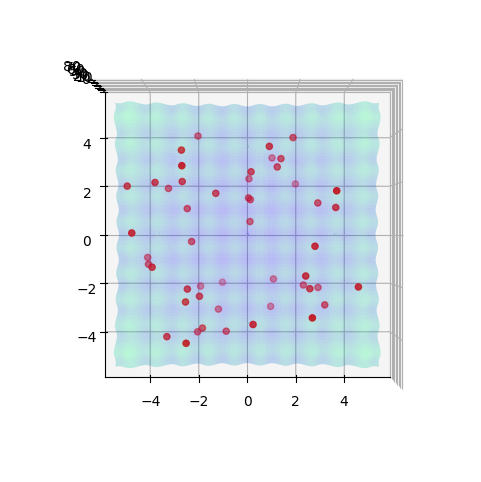

Iteration: 100 :: x_best = [-0.00141437 -0.00529181], f_best = 0.005951990778164884


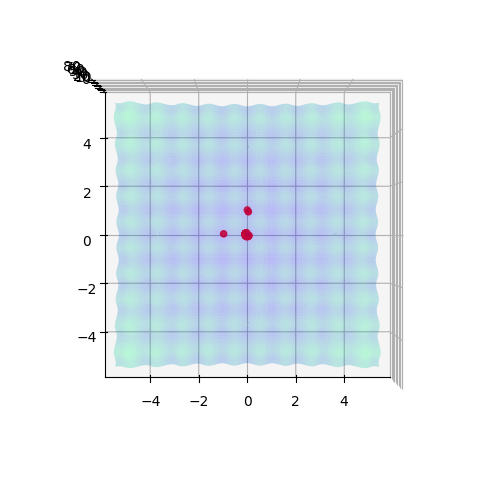

Iteration: 200 :: x_best = [-0.00141437 -0.00529181], f_best = 0.005951990778164884


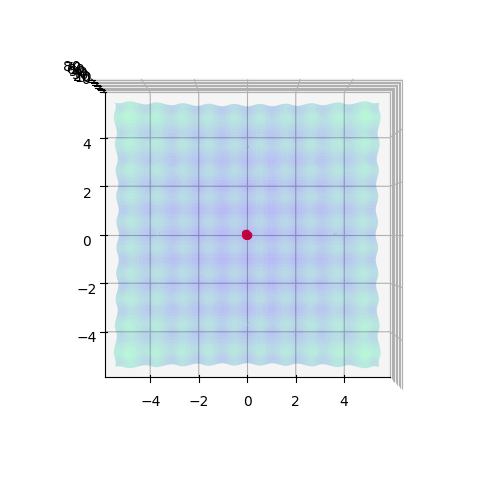

Iteration: 300 :: x_best = [-0.00141437 -0.00529181], f_best = 0.005951990778164884


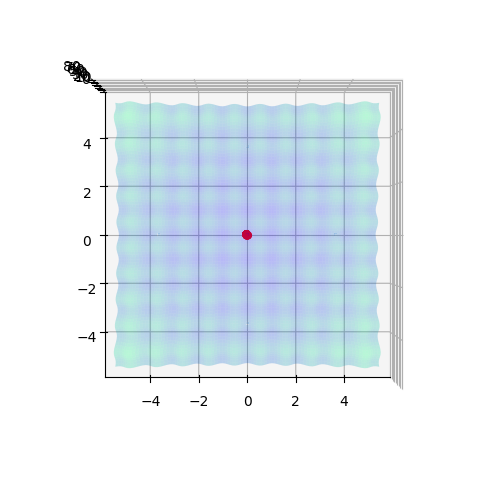

Iteration: 400 :: x_best = [-0.00141437 -0.00529181], f_best = 0.005951990778164884


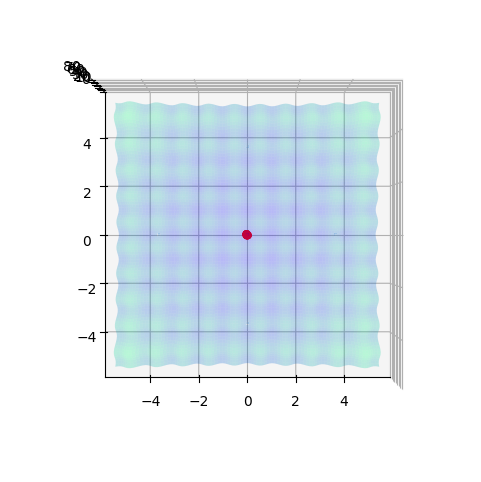

Iteration: 500 :: x_best = [-0.00141437 -0.00529181], f_best = 0.005951990778164884


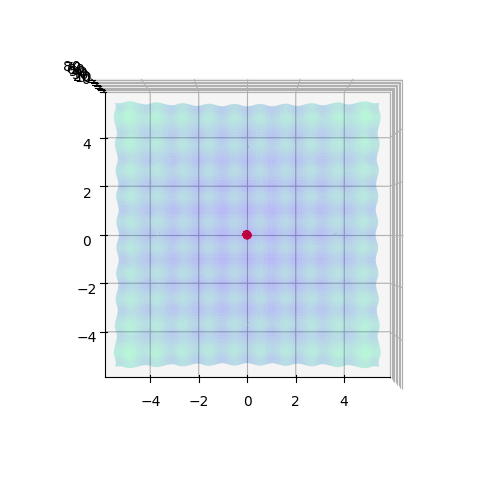

Iteration: 600 :: x_best = [-0.00141437 -0.00529181], f_best = 0.005951990778164884


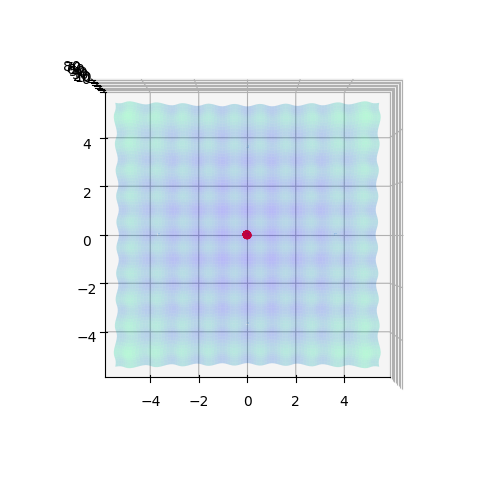

Iteration: 700 :: x_best = [-0.00141437 -0.00529181], f_best = 0.005951990778164884


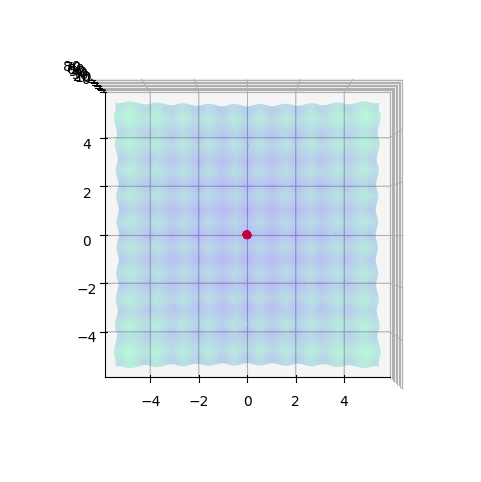

Iteration: 800 :: x_best = [-0.00141437 -0.00529181], f_best = 0.005951990778164884


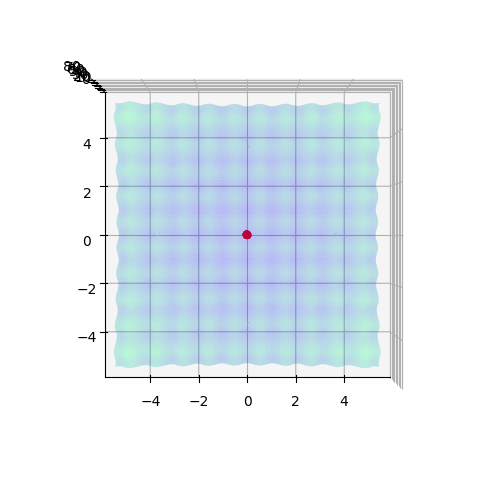

Iteration: 900 :: x_best = [-0.00141437 -0.00529181], f_best = 0.005951990778164884


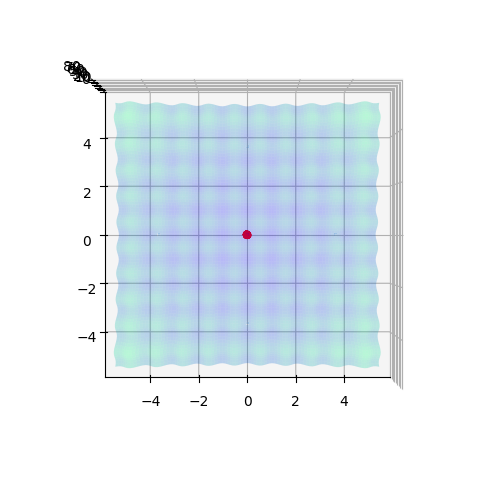

In [154]:
# Initial population
pop.initialise_positions('random')

# Evaluate the initial positions
pop.evaluate_fitness(lambda x: fun.get_function_value(x))

# Update the positions and fitness
pop.update_positions(level='population', selector='all')
pop.update_positions(level='global', selector='greedy')

# Save the initial state
history = [pop.fitness.copy()]

for iteration in range(1000):
    # Apply the perturbation heuristic
    # exec(op_to_exect)
    op.central_force_dynamic(pop, alpha=0.9, beta=0.45)
    
    # Evaluate the new positions
    pop.evaluate_fitness(lambda x: fun.get_function_value(x))

    # Choose random selectors (alpha version)
    selector = list(np.random.choice(['direct', 'greedy', 'probabilistic'], pop.num_agents))
    #selector = 'direct'

    # Update the positions
    pop.update_positions(level='population', selector=selector)
    pop.update_positions(level='global')   
    
    # Save the fitness
    history.append(pop.fitness.copy())

    if iteration % 100 == 0:
        print(f"Iteration: {iteration} ::", pop.get_state())
        show_positions()

Let us plot the historical values of the fitness

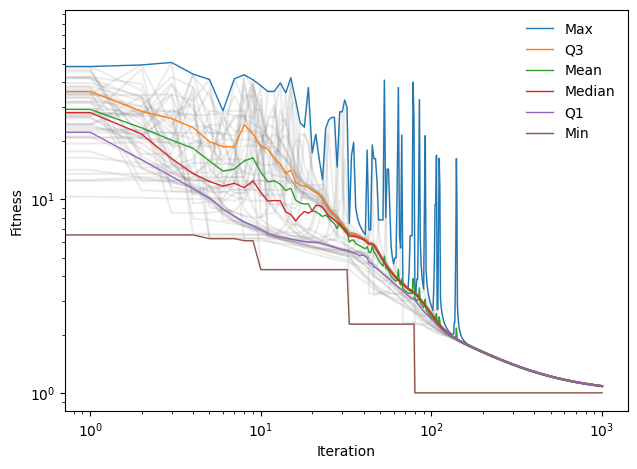

In [155]:
# Process the historical values
history = np.array(history) + 1

plt.figure()
# plot in gray scale to after plot some statistics above
plt.plot(history, color='gray', alpha=0.15)
plt.plot(history.max(axis=1), lw=1, label='Max')
plt.plot(np.quantile(history, 0.75, axis=1), lw=1, label='Q3')
plt.plot(history.mean(axis=1), lw=1, label='Mean')
plt.plot(np.median(history, axis=1), lw=1, label='Median')
plt.plot(np.quantile(history, 0.25, axis=1), lw=1, label='Q1')
plt.plot(history.min(axis=1), lw=1, label='Min')
#plt.plot(history.std(axis=1), lw=2, label='Std')

plt.legend(frameon=False)
plt.xlabel('Iteration'), plt.ylabel('Fitness')
plt.tight_layout()
plt.xscale('log')
plt.yscale('log')
plt.show()

## 4. Module of Metaheuristics (customhys.metaheuristic)
In this section, we will see how to use the module to build a metaheuristics.

In [28]:
from customhys import metaheuristic as mh
fun = bf.Rastrigin(3)
prob = fun.get_formatted_problem()

prob

{'function': <function customhys.benchmark_func.BasicProblem.get_formatted_problem.<locals>.<lambda>(x)>,
 'boundaries': (array([-5.12, -5.12, -5.12]), array([5.12, 5.12, 5.12])),
 'is_constrained': True,
 'features': '110',
 'func_name': 'Rastrigin',
 'dimensions': 3}

In [29]:
heur = [( # Search operator 1
    'differential_mutation',  # Perturbator
    {  # Parameters
        'expression': 'current-to-best',
        'num_rands': 2,
        'factor': 1.0},
    'greedy'  # Selector
), (  # Search operator 2
    'differential_crossover',  # Perturbator
    {  # Parameters
        'crossover_rate': 0.2,
        'version': 'binomial'
    },
    'greedy'  # Selector
)]

met = mh.Metaheuristic(prob, heur, num_iterations=1000)
met.verbose = True
met.run()
print('x_best = {}, f_best = {}'.format(*met.get_solution()))


Search operators to employ:
differential_mutation(expression='current-to-best',num_rands=2,factor=1.0) with greedy
differential_crossover(crossover_rate=0.2,version='binomial') with greedy
--------------------------------------------------
1
pop. radius: 1.4914125818146697
x_best = [-1.18414831 -0.84353062 -0.84804401], f_best = 17.49017565696642
2
pop. radius: 1.4669811877655843
x_best = [-1.18414831 -0.84353062 -0.84804401], f_best = 17.49017565696642
3
pop. radius: 1.4669811877655843
x_best = [-1.18414831 -0.84353062 -0.84804401], f_best = 17.49017565696642
4
pop. radius: 1.53618691853198
x_best = [-1.18414831 -0.84353062 -0.84804401], f_best = 17.49017565696642
5
pop. radius: 1.5405173047018352
x_best = [-1.18414831 -0.84353062 -0.84804401], f_best = 17.49017565696642
6
pop. radius: 1.5357591752817503
x_best = [-1.18414831 -0.84353062 -0.84804401], f_best = 17.49017565696642
7
pop. radius: 1.4649473839771543
x_best = [-1.18414831 -0.84353062 -0.84804401], f_best = 17.4901756569664

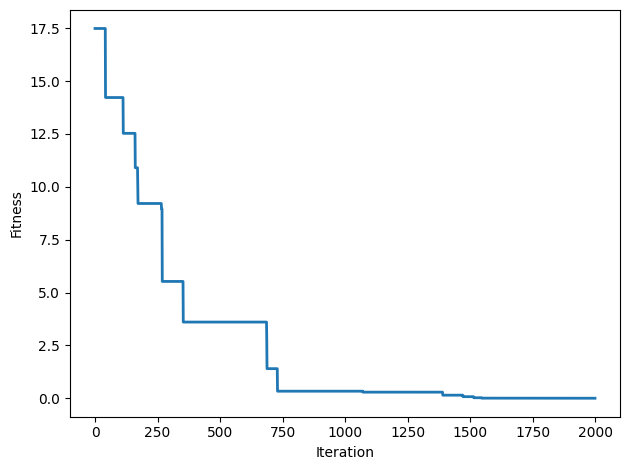

In [30]:
hist_values = met.historical

plt.figure()
plt.plot(hist_values['fitness'], lw=2)
plt.xlabel('Iteration'), plt.ylabel('Fitness')
plt.tight_layout()
plt.show()
# plt.savefig('ExFitness.svg')

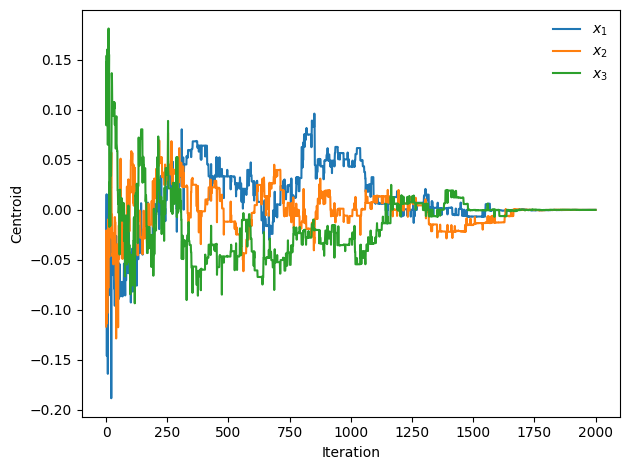

In [31]:
plt.figure()
plt.plot(hist_values['centroid'])
plt.xlabel(r'Iteration'), plt.ylabel(r'Centroid')
plt.legend([r'$x_1$', r'$x_2$', r'$x_3$'], frameon=False)
plt.tight_layout()
plt.show()
# plt.savefig('ExCentroid.svg')

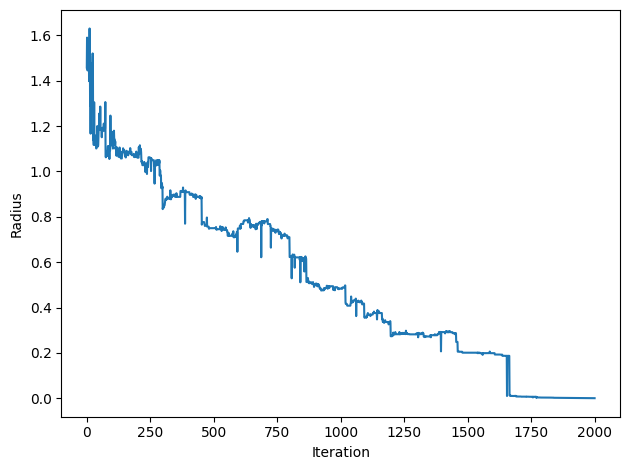

In [32]:
plt.figure()
plt.plot(hist_values['radius'])
plt.xlabel(r'Iteration'), plt.ylabel(r'Radius')
plt.tight_layout()
plt.show()
# plt.savefig('E|xRadius.svg')

Let us try another metaheuristic

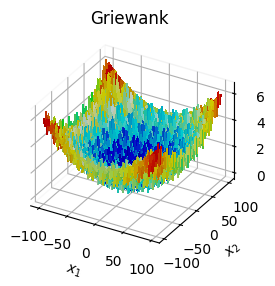

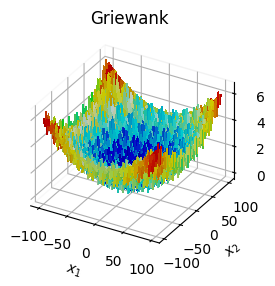

In [33]:
# This the minimisation problem to solve
fun = bf.Griewank(6)
prob = fun.get_formatted_problem()
fun.plot()

In [34]:
# This will be the metaheuristic
heu_seq = [
    ('random_search', {'scale': 1.0, 'distribution': 'uniform'}, 'greedy'),
    ('spiral_dynamic', {'radius': 0.9, 'angle': 33.5, 'sigma': 0.1}, 'all'),
    ('gravitational_search', {'gravity': 0.5, 'alpha': 0.2}, 'metropolis')
    ]
met = mh.Metaheuristic(prob, heur, num_iterations=1000, num_agents=100)
met.verbose = False
met.run()
print('x_best = {}, f_best = {}'.format(*met.get_solution()))

x_best = [ 0.03546697 -0.0016946  -0.11680194 -0.12092178 -0.00389322  0.07759565], f_best = 0.30658764763164814


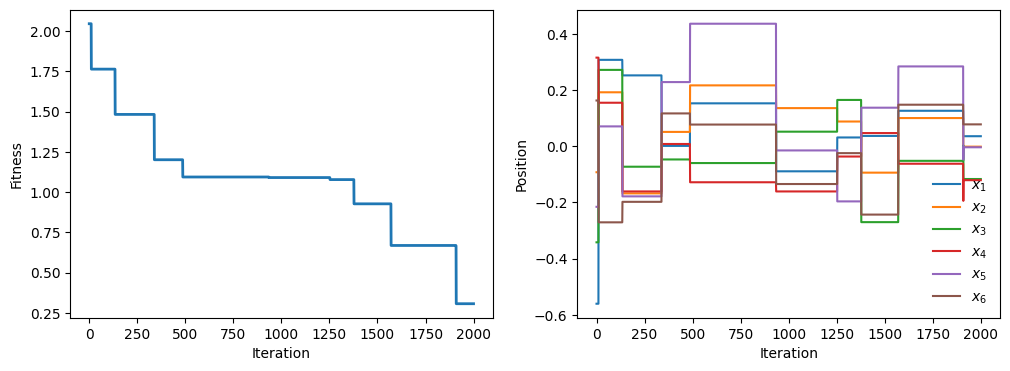

In [35]:
hist_values = met.historical

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(hist_values['fitness'], lw=2)
axs[0].set_xlabel('Iteration'), axs[0].set_ylabel('Fitness')

axs[1].plot(hist_values['position'])
axs[1].set_xlabel(r'Iteration'), axs[1].set_ylabel(r'Position')
axs[1].legend([f"$x_{ii+1}$" for ii in range(6)], frameon=False)

plt.show()

## 5. Module of Hyper-Heuristics (customhys.hyperheuristic)
This section is dedicated to the use of the module to implement a hyper-heuristic for finding the most suitable metaheuristic for a given problem.

In [36]:
parameters = dict(
    cardinality=3,  # Max. numb. of SOs in MHs, lvl:1
    cardinality_min=1,  # Min. numb. of SOs in MHs, lvl:1
    num_iterations=100,  # Iterations an MH performs, lvl:1
    num_agents=30,  # Agents in population,     lvl:1
    as_mh=True,  # HH sequence as a MH?,     lvl:2
    num_replicas=30,  # Replicas per each MH,     lvl:2
    num_steps=50,  # Trials per HH step,       lvl:2
    stagnation_percentage=0.37,  # Stagnation percentage,    lvl:2
    max_temperature=100,  # Initial temperature (SA), lvl:2
    min_temperature=1e-6,  # Min temperature (SA),     lvl:2
    cooling_rate=1e-3,  # Cooling rate (SA),        lvl:2
    temperature_scheme='fast',  # Temperature updating (SA),lvl:2
    acceptance_scheme='exponential',  # Acceptance mode,          lvl:2
    allow_weight_matrix=True,  # Weight matrix,            lvl:2
    trial_overflow=False,  # Trial overflow policy,    lvl:2
    learnt_dataset=None,  # If it is a learnt dataset related with the heuristic space
    repeat_operators=True,  # Allow repeating SOs inSeq,lvl:2
    verbose=True,  # Verbose process,          lvl:2
    learning_portion=0.37,  # Percent of seqs to learn  lvl:2
    solver='static')  # Indicate which solver use lvl:1

In [37]:
from customhys import hyperheuristic as hh

dime = 5
fun = bf.Griewank(dime)

cate = fun.get_features()
prob = fun.get_formatted_problem()

hyp = hh.Hyperheuristic(heuristic_space="default.txt",
                        problem=prob, parameters=parameters, file_label='Griewank-5D-Exp2')

best_sol, best_perf, hist_curr, hist_best = hyp.solve()

hyperheuristic.py:23: ImportWarning: `Tensorflow` not found! Please, install it to use the machine_learning module


Griewank-5D-Exp2 :: Step:    0, Action: None        , Temp: 1.00e+02, Card:   1, Perf: 9.04e-01 [Initial]
Griewank-5D-Exp2 :: Step:    1, Action: Restart     , Temp: 1.00e+02, Card:   1, candPerf: 1.17e+00, currPerf: 9.04e-01, bestPerf: 9.04e-01 , [Delta: 2.67e-01, ArgProb: -1.40e-03, Prob: 1.00] A
Griewank-5D-Exp2 :: Step:    2, Action: Add         , Temp: 5.00e+01, Card:   2, candPerf: 6.95e-01, currPerf: 1.17e+00, bestPerf: 9.04e-01 , [Delta: -4.76e-01, ArgProb: 5.00e-03, Prob: 1.00] A+
Griewank-5D-Exp2 :: Step:    3, Action: Add         , Temp: 3.33e+01, Card:   3, candPerf: 9.14e-01, currPerf: 6.95e-01, bestPerf: 6.95e-01 , [Delta: 2.19e-01, ArgProb: -3.45e-03, Prob: 1.00] A
Griewank-5D-Exp2 :: Step:    4, Action: Roll        , Temp: 2.50e+01, Card:   3, candPerf: 7.36e-01, currPerf: 9.14e-01, bestPerf: 6.95e-01 , [Delta: -1.78e-01, ArgProb: 3.74e-03, Prob: 1.00] A
Griewank-5D-Exp2 :: Step:    5, Action: Shift       , Temp: 2.00e+01, Card:   3, candPerf: 7.06e-01, currPerf: 7.36e-

/Users/jcrvz/PycharmProjects/customhys/customhys/population.py:235: RuntimeWarning: invalid value encountered in cast
  self.velocities[agent_id, :] = np.copy(self.previous_velocities[agent_id, :])


Griewank-5D-Exp2 :: Step:   24, Action: LocalShift  , Temp: 4.17e+00, Card:   3, candPerf: 9.93e-01, currPerf: 6.81e-01, bestPerf: 6.62e-01 , [Delta: 3.12e-01, ArgProb: -3.94e-02, Prob: 0.96] A
Griewank-5D-Exp2 :: Step:   25, Action: Shift       , Temp: 4.00e+00, Card:   3, candPerf: 4.77e-01, currPerf: 9.93e-01, bestPerf: 6.62e-01 , [Delta: -5.16e-01, ArgProb: 6.78e-02, Prob: 1.00] A+
Griewank-5D-Exp2 :: Step:   26, Action: Swap        , Temp: 3.85e+00, Card:   3, candPerf: 5.36e-01, currPerf: 4.77e-01, bestPerf: 4.77e-01 , [Delta: 5.92e-02, ArgProb: -8.09e-03, Prob: 0.99] A
Griewank-5D-Exp2 :: Step:   27, Action: RemoveMany  , Temp: 3.70e+00, Card:   1, candPerf: 7.47e-01, currPerf: 5.36e-01, bestPerf: 4.77e-01 , [Delta: 2.11e-01, ArgProb: -2.99e-02, Prob: 0.97] A
Griewank-5D-Exp2 :: Step:   28, Action: LocalShift  , Temp: 3.57e+00, Card:   1, candPerf: 9.02e-01, currPerf: 7.47e-01, bestPerf: 4.77e-01 , [Delta: 1.54e-01, ArgProb: -2.27e-02, Prob: 0.98] A
Griewank-5D-Exp2 :: Step:   2

In [38]:
# print("Performance: ", best_perf)
# print(best_sol)

In [64]:
from customhys import tools as tl
full_data = tl.merge_json("./data_files/raw/Griewank-5D-Exp2")
# full_data = tl.read_json("./Exp1.json")

100%|██████████| 3/3 [00:00<00:00, 17.59it/s]


Merged file saved: ./data_files/raw/Griewank-5D-Exp2.json


In [65]:
full_data = tl.read_json("./data_files/raw/Griewank-5D-Exp2.json")

In [66]:
tl.printmsk(full_data)

|-- {list: 3}
|  |-- 0 = {dict: 5}
|  |  |-- file_name = {str}
|  |  |-- step = {int}
|  |  |-- encoded_solution = {list: 1}
|  |  |  |-- 0 = {int}
:  :  :  :  
|  |  |-- performance = {float}
|  |  |-- details = {dict: 4}
|  |  |  |-- historical = {list: 30}
|  |  |  |  |-- 0 = {dict: 4}
|  |  |  |  |  |-- fitness = {list: 101}
|  |  |  |  |  |  |-- 0 = {float}
:  :  :  :  :  :  :  
|  |  |  |  |  |-- position = {list: 101}
|  |  |  |  |  |  |-- 0 = {list: 5}
|  |  |  |  |  |  |  |-- 0 = {float}
:  :  :  :  :  :  :  :  
:  :  :  :  :  :  :  
|  |  |  |  |  |-- centroid = {list: 101}
|  |  |  |  |  |  |-- 0 = {list: 5}
|  |  |  |  |  |  |  |-- 0 = {float}
:  :  :  :  :  :  :  :  
:  :  :  :  :  :  :  
|  |  |  |  |  |-- radius = {list: 101}
|  |  |  |  |  |  |-- 0 = {float}
:  :  :  :  :  :  :  
:  :  :  :  :  
|  |  |  |-- fitness = {list: 30}
|  |  |  |  |-- 0 = {float}
:  :  :  :  :  
|  |  |  |-- positions = {list: 30}
|  |  |  |  |-- 0 = {list: 5}
|  |  |  |  |  |-- 0 = {float}
: 

In [67]:
num_steps = len(full_data)
# print(full_data['details'])
# historical_fitness = [[x[['fitness']][-1] for x in historical] for historical in full_data['details']]
historical_fitness = [x['details']['fitness'] for x in full_data]
performances = [x['performance'] for x in full_data]
steps = [x['step'] for x in full_data]


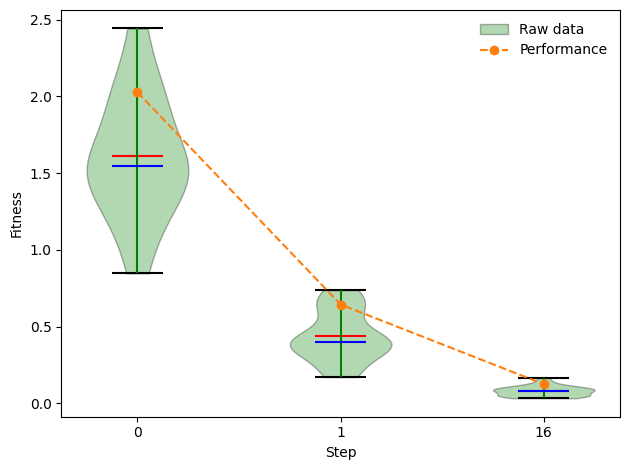

In [68]:
from customhys import visualisation as vis
vis.show_performance_overview(steps, historical_fitness, performances)

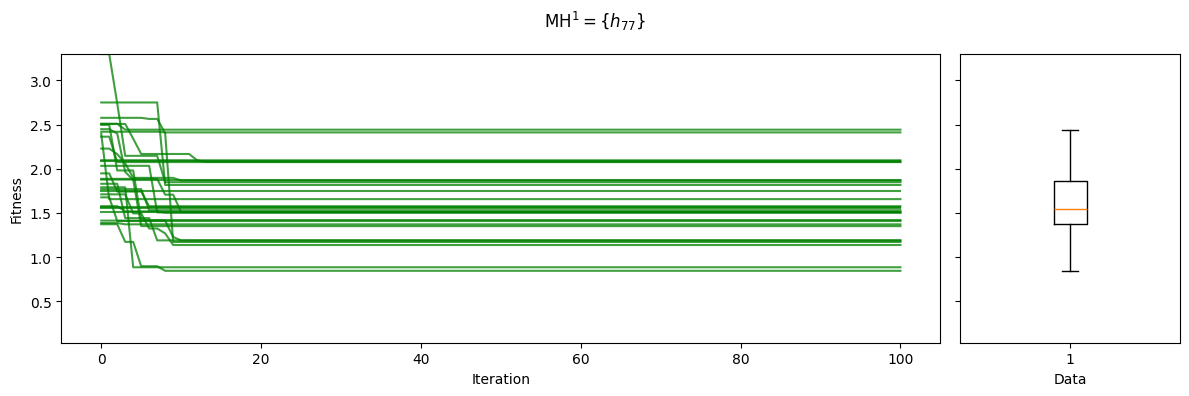

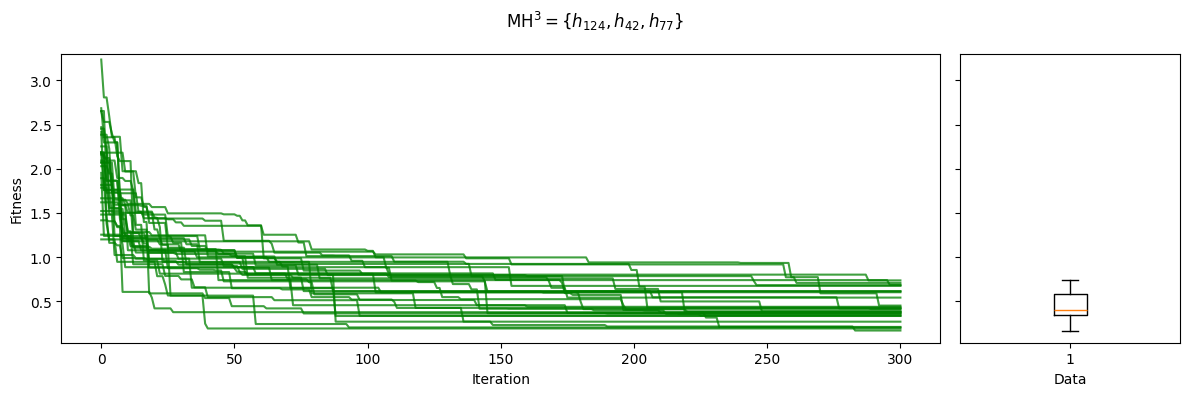

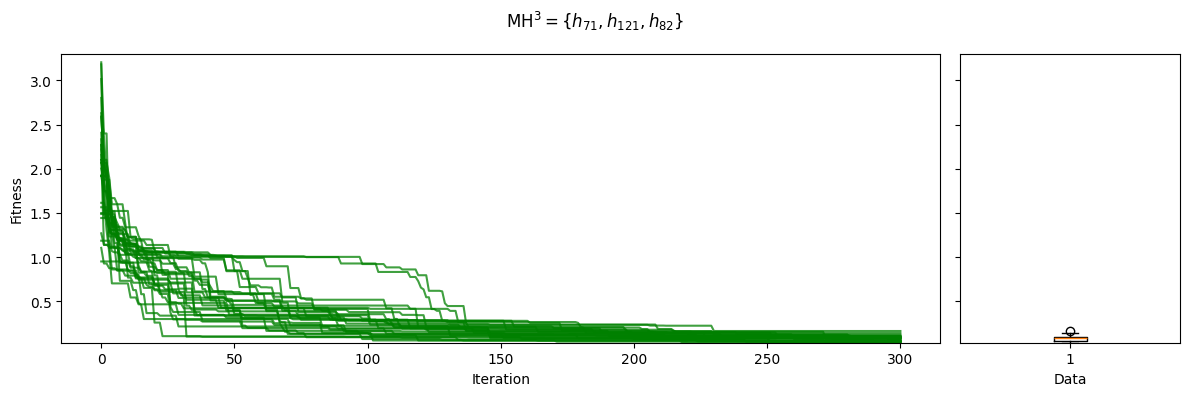

In [69]:
initial_fitness = max([max([x['fitness'][0] for x in fitness_rep['details']['historical']]) for fitness_rep in full_data])
best_fitness = np.min(historical_fitness)

for ii, step in enumerate(steps):
    historical_data = full_data[ii]['details']['historical']
    all_fitness_repetitions = np.array([fitness_rep['fitness'] for fitness_rep in historical_data]).T

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey='row', gridspec_kw={'width_ratios': [0.8, 0.2]})
    axs[0].plot(all_fitness_repetitions, 'g', alpha=0.75)
    axs[0].set_ylabel(r'Fitness')
    axs[0].set_xlabel(r'Iteration')
    axs[0].set_ylim([best_fitness, initial_fitness])

    axs[1].boxplot(historical_fitness[ii])
    axs[1].set_xlabel(r'Data')

    plt.suptitle(r'MH$^{' + '{}'.format(len(full_data[ii]['encoded_solution'])) + '} = \\{' +
              '}, '.join(['h_{' + str(x) for x in full_data[ii]['encoded_solution']]) + '}\\}$')
    plt.tight_layout()
    plt.show()
    # plt.savefig('hh_raw_fitness_s{}.eps'.format(data['step'][ii]))


In [70]:
met = mh.Metaheuristic(prob, heur, num_iterations=1000)
met.verbose = True
met.run()
print('x_best = {}, f_best = {}'.format(*met.get_solution()))


Search operators to employ:
differential_mutation(expression='current-to-best',num_rands=2,factor=1.0) with greedy
differential_crossover(crossover_rate=0.2,version='binomial') with greedy
--------------------------------------------------
1
pop. radius: 3.287891765380268
x_best = [ 23.35000941 -89.3011929   16.49357301   5.70190345  -5.51336111
 -11.40320448  10.46995256  76.91252812 -83.38429226 -99.34772102
  63.06021626 -26.70261021 -52.42376596 -32.1449222   54.22422171
 -38.04297343 -18.03508502  22.46390359  17.37781843   8.28700082], f_best = 122247.7137366044
2
pop. radius: 3.385560363838635
x_best = [ 1.00000000e+02 -1.00000000e+02  4.11639896e+01 -1.00000000e+02
  1.00000000e+02  1.66618987e+01 -1.00000000e+02  5.54703312e+01
 -1.00000000e+02 -1.00000000e+02  1.00000000e+02  3.11364956e+01
 -3.47600722e+01  5.50873009e+00  3.22379013e+01 -1.00000000e+02
 -3.55287257e+01  6.36709772e-02  5.77093555e+00 -1.00000000e+02], f_best = 95790.55991008562
3
pop. radius: 3.43610595105

In [71]:
hist_values = met.historical
tl.printmsk(hist_values)

|-- {dict: 4}
|  |-- fitness = {list: 2001}
|  |  |-- 0 = {ndarray: }
:  :  :  
|  |-- position = {list: 2001}
|  |  |-- 0 = {ndarray: 20}
:  :  :  
|  |-- centroid = {list: 2001}
|  |  |-- 0 = {ndarray: 20}
:  :  :  
|  |-- radius = {list: 2001}
|  |  |-- 0 = {float64}
:  :  :  


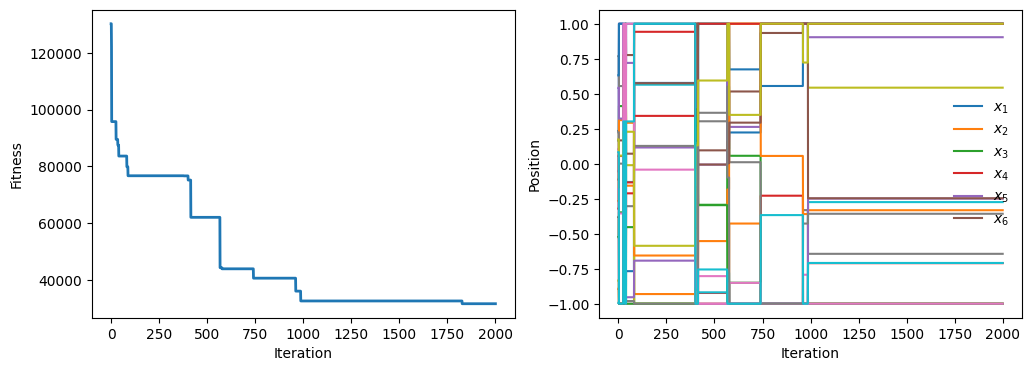

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(hist_values['fitness'], lw=2)
axs[0].set_xlabel('Iteration'), axs[0].set_ylabel('Fitness')

axs[1].plot(hist_values['position'])
# axs[1].plot(hist_values['radius'])
axs[1].set_xlabel(r'Iteration'), axs[1].set_ylabel(r'Position')
axs[1].legend([f"$x_{ii+1}$" for ii in range(6)], frameon=False)

plt.show()

### 5.1 Using CEC2005 functions
To use them we need to install the package `optproblems`

In [48]:
#!pip install optproblems

In [49]:
from customhys import benchmark_func as bf

In [50]:
problem = bf.CEC2005("F4", 5)

In [51]:
met = mh.Metaheuristic(problem.get_formatted_problem(), heur, num_iterations=1000)
met.verbose = True
met.run()
print('x_best = {}, f_best = {}'.format(*met.get_solution()))


Search operators to employ:
differential_mutation(expression='current-to-best',num_rands=2,factor=1.0) with greedy
differential_crossover(crossover_rate=0.2,version='binomial') with greedy
--------------------------------------------------
1
pop. radius: 2.067795875871185
x_best = [-45.75797592  23.08330648 -41.24376108 -62.45077859  30.74533337], f_best = 8439.940519916248
2
pop. radius: 2.0180463721984916
x_best = [  26.93808916  -48.60118548  -51.315895   -100.          100.        ], f_best = 2236.8057662639635
3
pop. radius: 2.097412869722046
x_best = [  26.93808916  -48.60118548  -51.315895   -100.          100.        ], f_best = 2236.8057662639635
4
pop. radius: 2.105867188762
x_best = [  26.93808916  -48.60118548  -51.315895   -100.          100.        ], f_best = 2236.8057662639635
5
pop. radius: 2.121970897644661
x_best = [  42.92169356 -100.           -3.71953077  -93.8366708    73.64153939], f_best = 414.6568903852042
6
pop. radius: 1.9138524522380547
x_best = [  42.9216

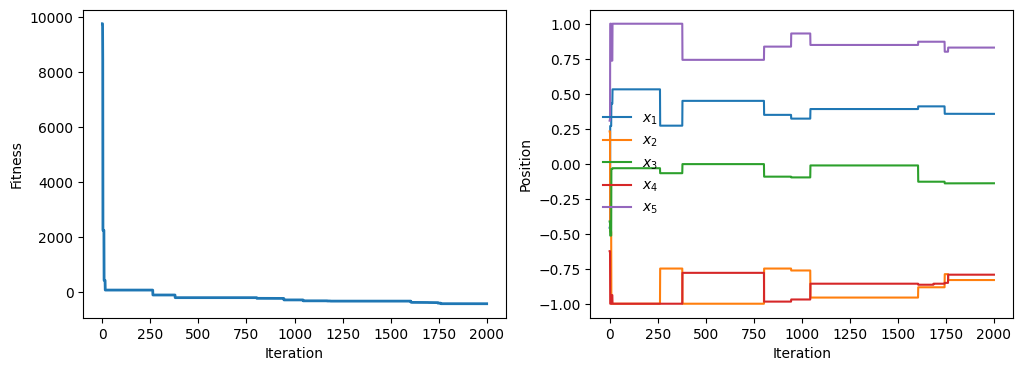

In [52]:
hist_values = met.historical
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(hist_values['fitness'], lw=2)
axs[0].set_xlabel('Iteration'), axs[0].set_ylabel('Fitness')

axs[1].plot(hist_values['position'])
# axs[1].plot(hist_values['radius'])
axs[1].set_xlabel(r'Iteration'), axs[1].set_ylabel(r'Position')
axs[1].legend([f"$x_{ii+1}$" for ii in range(6)], frameon=False)

plt.show()

In [53]:
dime = 20
fun = bf.CEC2005("F4", dime)

cate = fun.get_features()
prob = fun.get_formatted_problem()

hyp = hh.Hyperheuristic(heuristic_space="default.txt",
                        problem=prob, parameters=parameters, file_label='CEC-F4-20D-Exp2')

best_sol, best_perf, hist_curr, hist_best = hyp.solve()

CEC-F4-20D-Exp2 :: Step:    0, Action: None        , Temp: 1.00e+02, Card:   1, Perf: 1.31e+05 [Initial]
CEC-F4-20D-Exp2 :: Step:    1, Action: Shift       , Temp: 1.00e+02, Card:   1, candPerf: 7.67e+04, currPerf: 1.31e+05, bestPerf: 1.31e+05 , [Delta: -5.45e+04, ArgProb: 4.15e-03, Prob: 1.00] A+
CEC-F4-20D-Exp2 :: Step:    2, Action: Roll        , Temp: 5.00e+01, Card:   1, candPerf: 7.91e+04, currPerf: 7.67e+04, bestPerf: 7.67e+04 , [Delta: 2.37e+03, ArgProb: -3.62e-04, Prob: 1.00] A
CEC-F4-20D-Exp2 :: Step:    3, Action: Roll        , Temp: 3.33e+01, Card:   1, candPerf: 7.38e+04, currPerf: 7.91e+04, bestPerf: 7.67e+04 , [Delta: -5.29e+03, ArgProb: 1.21e-03, Prob: 1.00] A+
CEC-F4-20D-Exp2 :: Step:    4, Action: RollMany    , Temp: 2.50e+01, Card:   1, candPerf: 7.59e+04, currPerf: 7.38e+04, bestPerf: 7.38e+04 , [Delta: 2.06e+03, ArgProb: -6.29e-04, Prob: 1.00] A
CEC-F4-20D-Exp2 :: Step:    5, Action: Shift       , Temp: 2.00e+01, Card:   1, candPerf: 1.01e+05, currPerf: 7.59e+04, b

In [54]:
full_data = tl.merge_json("./data_files/raw/CEC-F4-20D-Exp2")

100%|██████████| 9/9 [00:00<00:00, 18.92it/s]


Merged file saved: ./data_files/raw/CEC-F4-20D-Exp2.json


In [55]:
full_data = tl.read_json("./data_files/raw/CEC-F4-20D-Exp2.json")

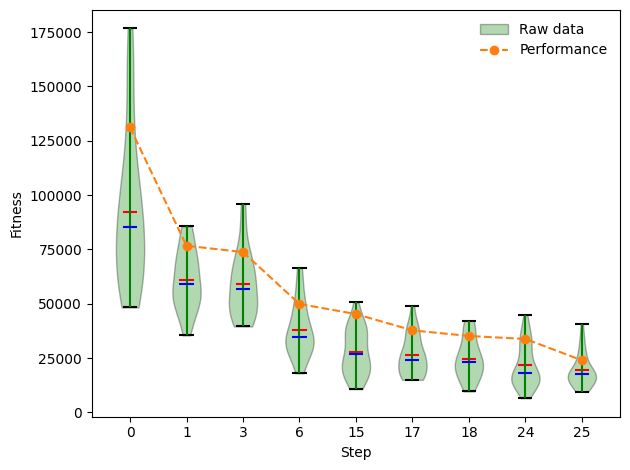

In [56]:
num_steps = len(full_data)
# print(full_data['details'])
# historical_fitness = [[x[['fitness']][-1] for x in historical] for historical in full_data['details']]
historical_fitness = [x['details']['fitness'] for x in full_data]
performances = [x['performance'] for x in full_data]
steps = [x['step'] for x in full_data]

vis.show_performance_overview(steps, historical_fitness, performances)

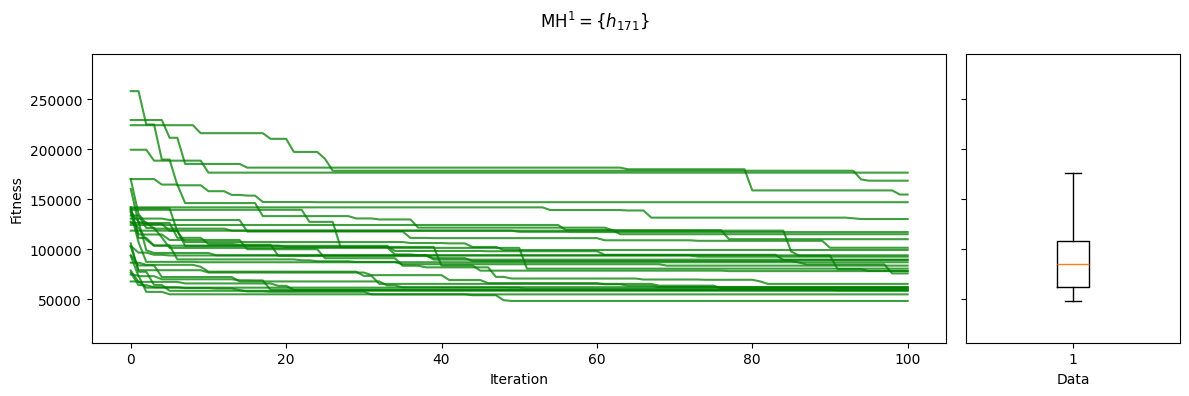

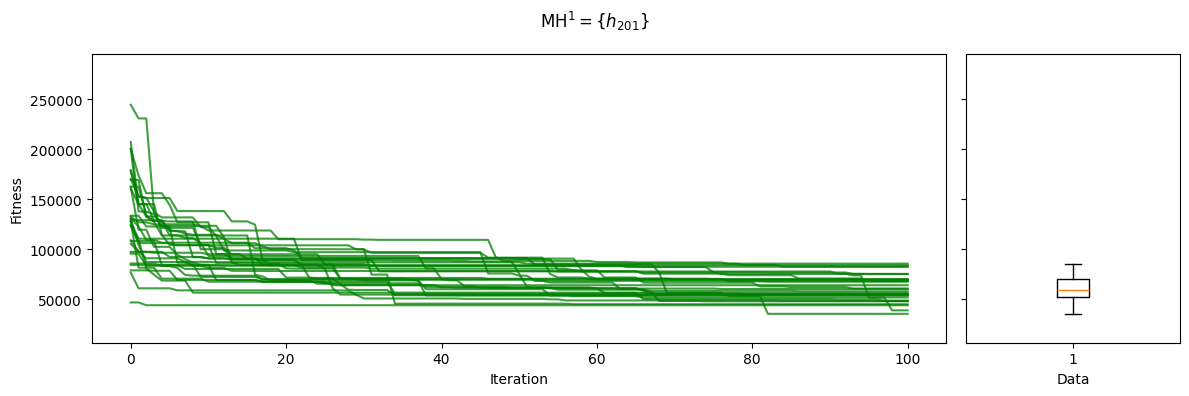

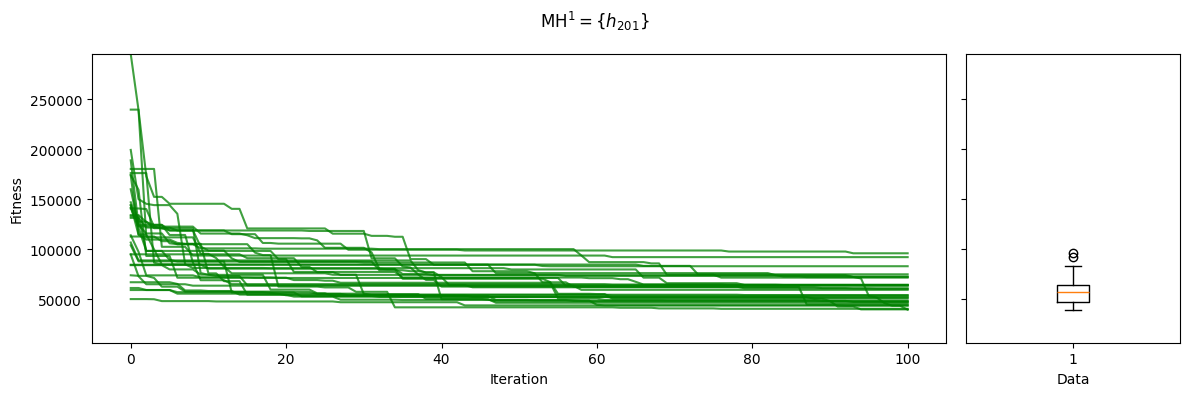

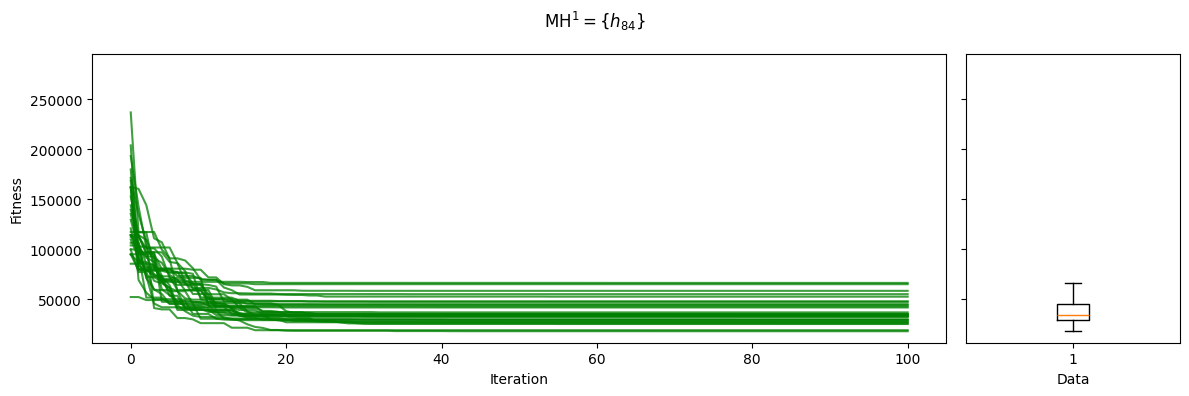

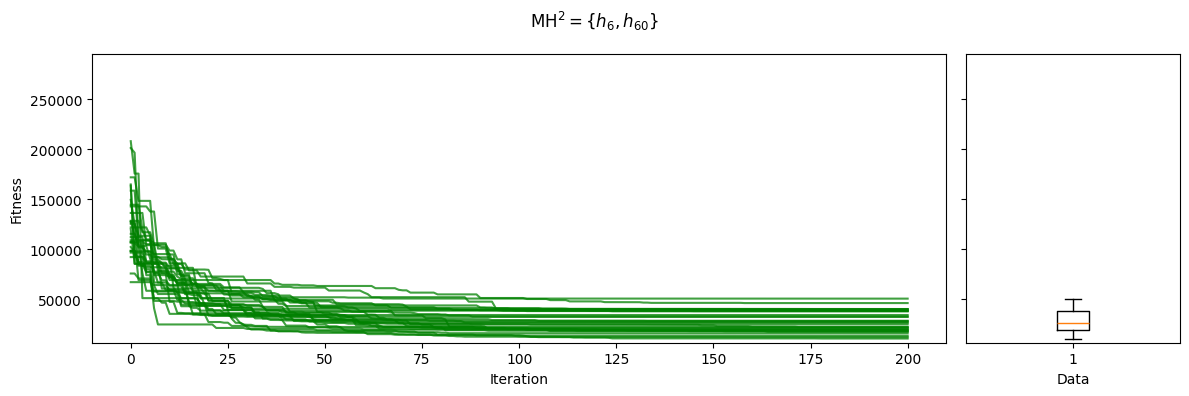

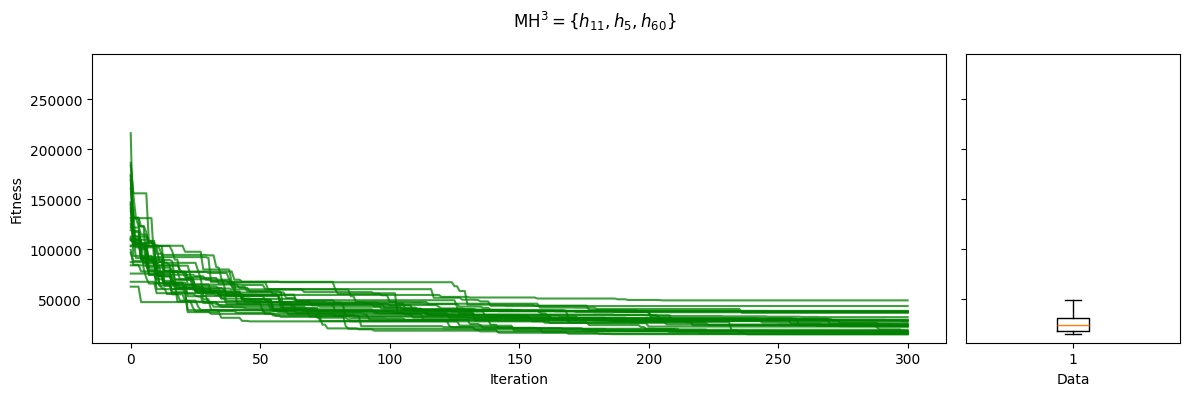

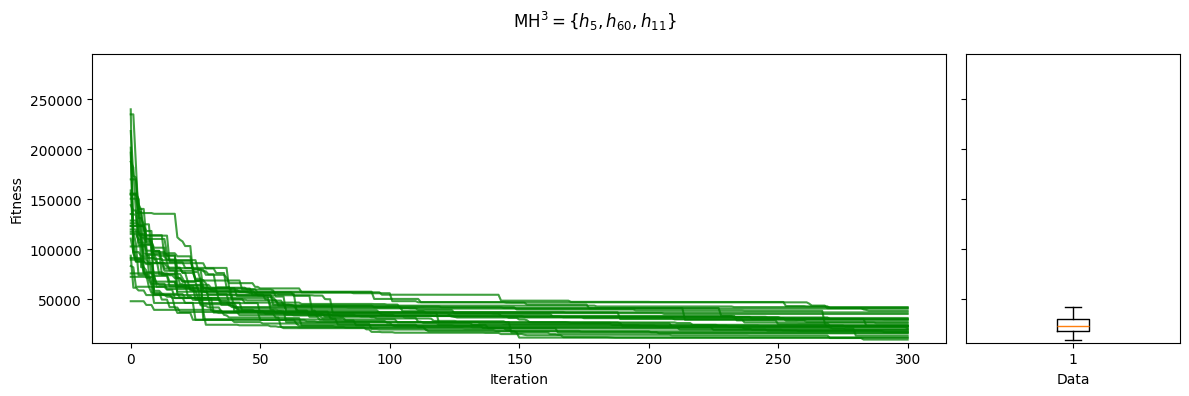

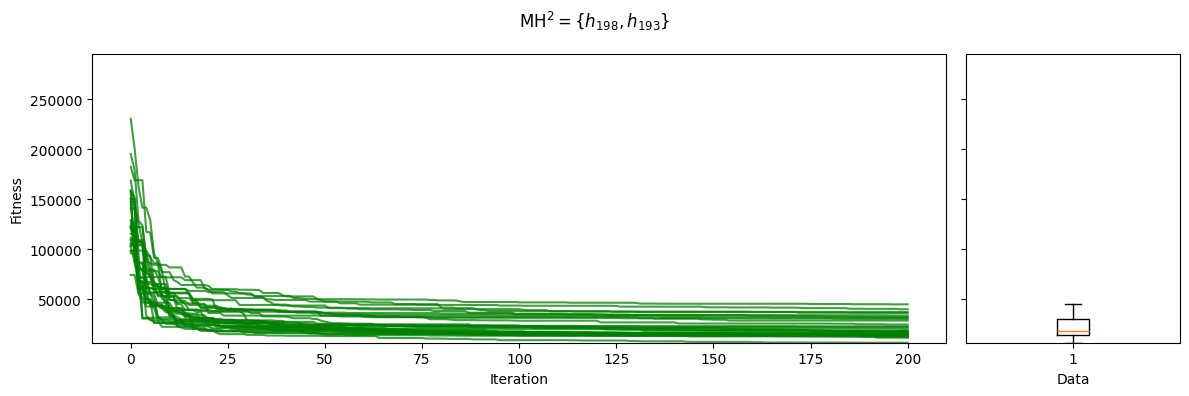

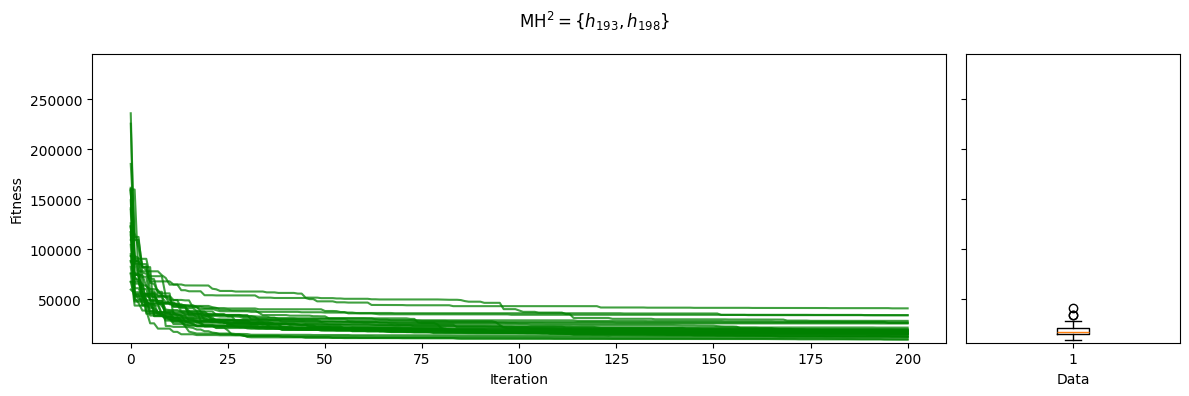

In [57]:
initial_fitness = max([max([x['fitness'][0] for x in fitness_rep['details']['historical']]) for fitness_rep in full_data])
best_fitness = np.min(historical_fitness)

for ii, step in enumerate(steps):
    historical_data = full_data[ii]['details']['historical']
    all_fitness_repetitions = np.array([fitness_rep['fitness'] for fitness_rep in historical_data]).T

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey='row', gridspec_kw={'width_ratios': [0.8, 0.2]})
    axs[0].plot(all_fitness_repetitions, 'g', alpha=0.75)
    axs[0].set_ylabel(r'Fitness')
    axs[0].set_xlabel(r'Iteration')
    axs[0].set_ylim([best_fitness, initial_fitness])

    axs[1].boxplot(historical_fitness[ii])
    axs[1].set_xlabel(r'Data')

    plt.suptitle(r'MH$^{' + '{}'.format(len(full_data[ii]['encoded_solution'])) + '} = \\{' +
              '}, '.join(['h_{' + str(x) for x in full_data[ii]['encoded_solution']]) + '}\\}$')
    plt.tight_layout()
    plt.show()
    # plt.savefig('hh_raw_fitness_s{}.eps'.format(data['step'][ii]))
